In [6]:
import json
import os
from pathlib import Path
from tqdm import tqdm

In [11]:
file_name = os.listdir('label')
root_dir = './label'

class_name = []
count = 0

for file in tqdm(file_name):
    file = os.path.join(root_dir, file)

    try:
        with open(file, encoding='UTF8') as f:
            label = json.load(f)  # load JSON
    except:
        print('error')
        print(file)
        count += 1

    l = len(label['annotations'])
    
    label_path = './txt/' + os.path.basename(file).split('json')[0] + 'txt'
    
    with open(label_path, 'w') as f:
        f.write('')
    
    width, height = label['images'][0]['width'], label['images'][0]['height']
    
    for i in range(l):
        # box
        x, y, w, h = label['annotations'][i]['bbox']  # x, y, w, h
        xywh = [((x + (x+w))/2) / width, ((y + (y+h))/2) / height, w / width, h / height]  # xywh normalized
        
        # class
        cls = label['annotations'][i]['attributes']['class']  # class name
        
        if cls not in class_name:
            class_name.append(cls)
        
        line = class_name.index(cls), *xywh  # YOLO format (class_index, xywh)
        
        with open(label_path, 'a') as f:
            f.write(('%g ' * len(line)).rstrip() % line + '\n')
    
print(count)

100%|██████████| 5115/5115 [00:10<00:00, 505.67it/s]

0


In [12]:
class_name

['ConcreteCrack',
 'PaintDamage',
 'Spalling',
 'Efflorescene',
 'Exposure',
 'SteelDefect']

2560 1440
1535 0 240 1450
[0.646484375, 0.5034722222222222, 0.09375, 1.0069444444444444]


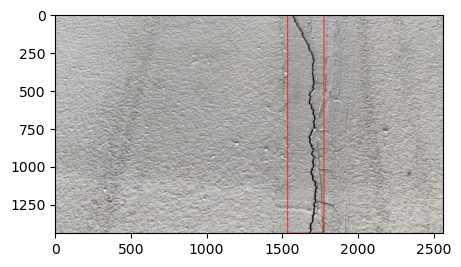

In [15]:
import json
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

with open('./label/101_04cb5c69-e20b-4cbd-a071-f4a7e798a1fc.json', encoding='UTF8') as f:
    label = json.load(f)  # load JSON

im = cv2.cvtColor(cv2.imread('101_04cb5c69-e20b-4cbd-a071-f4a7e798a1fc.tiff'), cv2.COLOR_BGR2RGB)

width, height = label['images'][0]['width'], label['images'][0]['height']
x, y, w, h = label['annotations'][0]['bbox']  # x, y, w, h
print(width, height)
print(x, y, w, h) # x, y, w, h

xywh = [((x + (x+w))/2) / width, ((y + (y+h))/2) / height, w / width, h / height]

plt.figure(figsize=(5, 5))
cv2.rectangle(im, [x, y, w, h], (255, 0, 0), 3)
plt.imshow(im)

print(xywh)